In [1]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [2]:
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("WordCount")\
    .getOrCreate()

In [3]:
sc=spark.sparkContext

In [4]:
JaneAusten=sc.textFile("JaneAusten.txt")

In [5]:
JaneAusten.take(10)

['',
 "Project Gutenberg's The Complete Works of Jane Austen, by Jane Austen",
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 'Title: The Complete Project Gutenberg Works of Jane Austen']

In [6]:
import string
def lower_punc(x):
    x = x.lower()
    x=x.translate(str.maketrans('', '', string.punctuation))
    return x

In [7]:
JaneAusten = JaneAusten.map(lower_punc)
JaneAusten.take(10)

['',
 'project gutenbergs the complete works of jane austen by jane austen',
 '',
 'this ebook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever  you may copy it give it away or',
 'reuse it under the terms of the project gutenberg license included',
 'with this ebook or online at wwwgutenbergorg',
 '',
 '',
 'title the complete project gutenberg works of jane austen']

In [8]:
# We use split function to separate the words in all lines .

In [9]:
JaneAusten=JaneAusten.flatMap(lambda satir: satir.split(" "))
JaneAusten.take(10)

['',
 'project',
 'gutenbergs',
 'the',
 'complete',
 'works',
 'of',
 'jane',
 'austen',
 'by']

In [10]:
JaneAusten = JaneAusten.filter(lambda x:x!='')
JaneAusten.take(10)

['project',
 'gutenbergs',
 'the',
 'complete',
 'works',
 'of',
 'jane',
 'austen',
 'by',
 'jane']

In [11]:
JaneAusten.count()

780134

In [12]:
JaneAusten_count=JaneAusten.map(lambda  word:(word,1))
JaneAusten_count.take(10)

[('project', 1),
 ('gutenbergs', 1),
 ('the', 1),
 ('complete', 1),
 ('works', 1),
 ('of', 1),
 ('jane', 1),
 ('austen', 1),
 ('by', 1),
 ('jane', 1)]

In [13]:
JaneAusten_count_RBK=JaneAusten_count.reduceByKey(lambda x,y:(x+y))
JaneAusten_count_RBK.take(10)

[('project', 103),
 ('of', 23104),
 ('jane', 557),
 ('this', 2748),
 ('ebook', 10),
 ('is', 5350),
 ('use', 184),
 ('anyone', 45),
 ('anywhere', 40),
 ('at', 5102)]

In [14]:
JaneAusten_count_RBK.count()

20309

In [15]:
JaneAusten_count_RBK.sortBy(lambda x: x[1],ascending=False).take(10)

[('the', 28485),
 ('to', 25945),
 ('and', 23614),
 ('of', 23104),
 ('a', 14252),
 ('her', 13889),
 ('i', 13344),
 ('in', 12120),
 ('was', 11734),
 ('it', 10579)]

In [16]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stopwords =stopwords.words('english')

In [19]:
JaneAusten_count_RBK = JaneAusten_count_RBK.filter(lambda x: x[0] not in stopwords).sortByKey(False)

In [20]:
JaneAusten_count_RBK.sortBy(lambda x: x[1],ascending=False).take(10)

[('could', 3751),
 ('would', 3392),
 ('mr', 3086),
 ('mrs', 2522),
 ('must', 2253),
 ('said', 2145),
 ('much', 2028),
 ('one', 1975),
 ('miss', 1946),
 ('every', 1538)]

In [52]:
import time
list=[]
for i in range(1,5):
    j=1
    start_time = time.time()
    spark=SparkSession.builder.master("local["+str(j)+"]").appName("WordCount").getOrCreate()
    sc=spark.sparkContext
    JaneAusten=sc.textFile("Shakespeare.txt")
    JaneAusten = JaneAusten.map(lower_punc)
    JaneAusten=JaneAusten.flatMap(lambda satir: satir.split(" "))
    JaneAusten = JaneAusten.filter(lambda x:x!='')
    JaneAusten_count=JaneAusten.map(lambda  word:(word,1))
    JaneAusten_count_RBK=JaneAusten_count.reduceByKey(lambda x,y:(x+y))
    print("The number of cores: ",i,", Execution time: ","%s seconds" % (time.time() - start_time))
    list.append((time.time() - start_time))

The number of cores:  1 , Execution time:  0.04850888252258301 seconds
The number of cores:  2 , Execution time:  0.04846811294555664 seconds
The number of cores:  3 , Execution time:  0.03597831726074219 seconds
The number of cores:  4 , Execution time:  0.03419995307922363 seconds


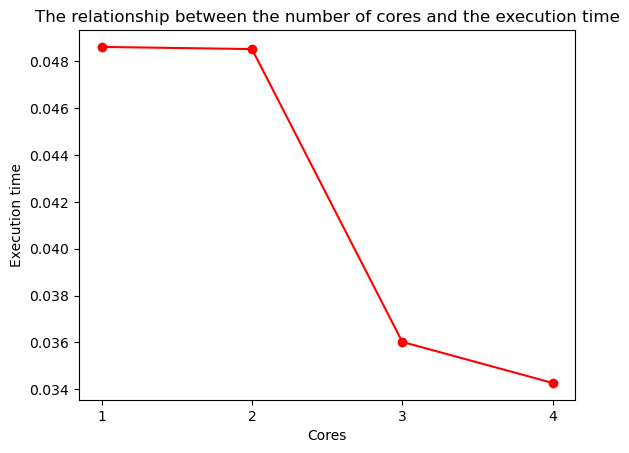

In [53]:
import matplotlib.pyplot as plt
core = ['1','2','3','4']
plt.plot(core, list,marker = 'o',c='red')
plt.xlabel('Cores')
plt.ylabel('Execution time')
plt.title('The relationship between the number of cores and the execution time')
plt.show()